In [5]:
!python --version

Python 3.10.5


In [6]:
!pip show xgboost | grep "Version"

Version: 2.1.2


In [7]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(
    objective="reg:squarederror", 
    colsample_bytree=0.3, 
    learning_rate=0.1, 
    max_depth=5, 
    alpha=10, 
    n_estimators=100
)

In [11]:
# Train the model
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [12]:
# Make predictions
y_pred = xg_reg.predict(X_test)

In [13]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.5444943782523535


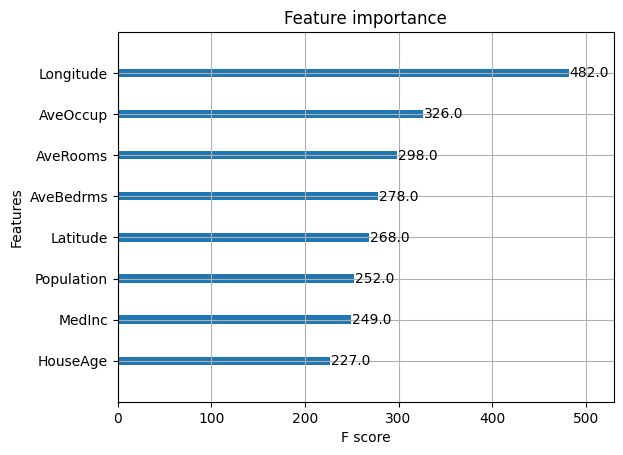

In [14]:
# Plot feature importance (optional)
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.show()

In [17]:
#!pip install graphviz

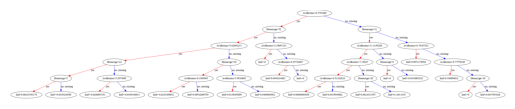

In [18]:
# Visualize the first tree in the model (optional)
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()